# Esercitazione 1

Il primo esercizio richiede l'utilizzo della divisione in blocchi per il calcolo dell'incertezza. Per questa ragione ho preferito preparare una classe che permetta di agevolare la divisione in blocchi. La classe si basa su un metodo *CalcolaBlocco* che misura ogni step il valore richiesto e, dopo aver fatto un certo numero di passi singoli fissato, salva su una variabile il valore del blocco ottenuto. Successivamente è presente un metodo *GetSomme* che aggiunge il valore del blocco e il suo quadrato rispettivamente alla somma e alla somma quadratica dei valori dei blocchi precedenti. La classe contiene anche un metodo *Results* che calcola l'errore e stampa su file i risultati e un metodo *Reset* necessario per preparare le variabili prima del prossimo blocco. Infine  il metodo *PrintBlocco* stampa a video il valore di un blocco. Poichè l'algoritmo per il calcolo del valore di un blocco dipende dal problema in esame, ho deciso di scrivere il metodo *CalcolaBlocco* come virtuale puro. In questo modo aggiungere per ogni problema una classe figlia con il proprio metodo *CalcolaBlocco*.

## Calcolo valore medio e varianza della distribuzione uniforme

Per il calcolo del valore medio e della varianza di una distribuzione uniforme su $[0,1]$ devo soltanto generare punti casuali in questo intervallo. Il metodo *CalcolaBlocco* si limita a calcolare, nel caso del valore medio, la media dei numeri generati e, nel caso della varianza, il valore medio di una espressione.

Per i seguenti grafici ho utilizzato $100$ blocchi ognuno contenente $10^4$ lanci. Sui grafici vengono plottati i valori medi e le incertezze ogni blocco aggiunto. Inoltre è prensente una linea per indicare il valore esatto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

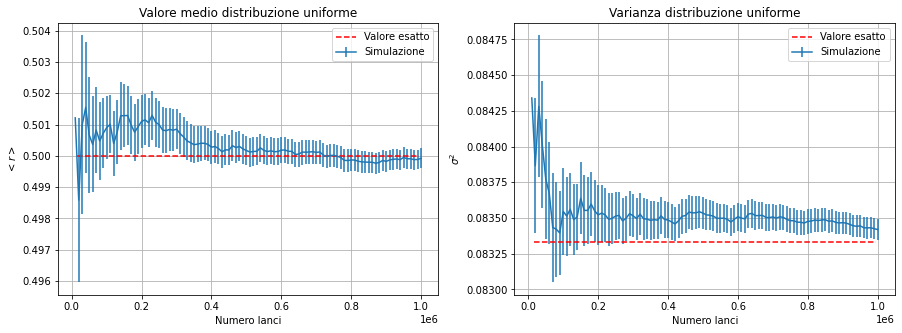

In [9]:
# Carico i dati da file
x_media, media, media_err = np.loadtxt("../Esercizio1/valore_medio.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
x_varianza, varianza, varianza_err = np.loadtxt("../Esercizio1/varianza.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

# Prepara due immagini, una per il valore medio e una per la varianza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Grafico per il valore medio
ax1.errorbar(x_media, media, yerr = media_err, label = "Simulazione")
ax1.axhline(y = 1/2, xmin = 0.05, xmax = 0.95, color = 'red', ls = "--", label = "Valore esatto")
ax1.set_xlabel('Numero lanci')
ax1.set_ylabel('$<r>$')
ax1.set_title("Valore medio distribuzione uniforme")
ax1.grid(True)
ax1.legend()

# Grafico per la varianza
ax2.errorbar(x_varianza, varianza, yerr = varianza_err, label = "Simulazione")
ax2.axhline(y = 1/12, xmin = 0.05, xmax = 0.95, color = 'red', ls = "--", label = "Valore esatto")
ax2.set_xlabel('Numero lanci')
ax2.set_ylabel('$\sigma^2$')
ax2.set_title("Varianza distribuzione uniforme")
ax2.legend()
ax2.grid(True)

I risultati sono compatibili con il valore esatto: il risultato esatto del valore medio quasi coincide con quello calcolato, mentre il calcolo esatto della varianza dista circa una deviazione standard del valore calcolato.

## Chi quadro

Per il calcolo del chi quadro utilizzo la stessa classe preparata per la media a blocchi, ma in modo leggermente diverso. Non utilizzo più i metodi *GetSomme* e *Results* perchè non sono interessato a medie progressive e incertezze, ma utilizzo il metodo *Print* che stampa su file solo il valore del blocco calcolato. Il metodo *CalcolaBlocco* adesso genera un certo numero di punti casuali in $[0,1]$ e li suddivide in $100$ sottointervalli, calcola il chi quadro e salva il valore del blocco.

Per il seguente istogramma ho deciso di utilizzare $1000$ blocchi ognuno ottenuto con $10^4$ numeri casuali. Mi aspetto di trovare come valore più probabile $100$ come osservato nella consegna dell'esercizio.

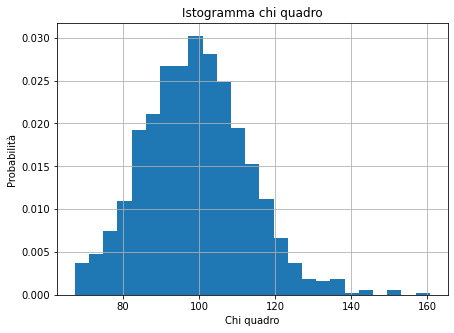

In [3]:
# Carica i dati da file
chi = np.loadtxt("../Esercizio1/chi_quadro.txt")

# Prepara l'istogramma
n_bins = 25
fig, ax = plt.subplots(1, 1,figsize=(7,5))
ax.set_xlabel('Chi quadro')
ax.set_ylabel('Probabilità')
ax.set_title('Istogramma chi quadro')
plt.hist(chi, n_bins, density = True)
plt.grid(True)

Il valore più probabile è in corrispondenza di 100, quindi l'assunzione era corretta. Inoltre si nota che la forma della distribuzione ottenuta non è simmetrica ma tende ad avere code più significative per valori maggiori del chi quadro.

## Inversione delle probabilità

Per aggiungere al generatore di numeri casuali una funzione che genera numeri casuali secondo una data $p(x)$ devo prima calcolare la cumulativa $P(x)$ e poi invertirla per ottenere $F(u)$. In questo modo data una variabile casuale distribuita uniformemente $u$, $F(u)$ restituirà una variabile casuale distribuita secondo $p(x)$. Per una distribuzione esponenziale e una distribuzione di Cauchy si ha

$$
p(x) = \lambda e^{-\lambda x} \implies P(x) = 1-e^{-\lambda x} \implies F(u) = -\frac{log(1-u)}{\lambda}
$$

$$
p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2 + \Gamma^2} \implies P(x) = \frac{1}{2} + \frac{1}{\pi} arctan \bigg(\frac{x-\mu}{\Gamma}\bigg) \implies F(u) = \mu + \Gamma tan\bigg(\pi\big(u-\frac{1}{2}\big)\bigg)
$$

Poichè il generatore di numeri casuali ha già una funzione per generare numeri casuali distribuiti uniformemente ho soltanto aggiunto delle funzioni che ritornano il valore di queste $F(u)$. Nell'implementazione di queste funzioni devo controllare di non ottenere dei valori infiniti. Nel caso della distribuzione esponenziale questo equivale a $u \neq 1$ mentre per la lorentziana implica $u \neq 1$ e $u \neq 0$. Per come è implementato il generatore uniforme, i numeri vengono prodotti nell'intervallo $[0, 1)$, pertanto è necessario solo un controllo sulla lorentziana.

## Istrogrammi della somma di variabili casuali

Per questo esercizio ho usato il metodo *Print* come nel calcolo del chi quadro. L'unica differenza sta nell'implementazione di *CalcolaBlocco* che adesso torna ad essere una soltanto una media come nella prima richiesta.

In [4]:
# Necessario per fare il fit
from scipy.optimize import curve_fit

# Definisco una gaussiana per poter fare il fit
def gauss(x, a, b, c):
    return a * np.exp(-b * (x - c)**2)

# Definisco una lorentziana per poter fare il fit
def lorentz(x, a, b, c):
    return a / (b + (x - c)**2)

### Uniforme

Per il calcolo con la distribuzione uniforme non ho bisogno di definire una nuova classe figlia poichè posso utilizzare quella introdotta per calcolare il valore medio della distribuzione. I seguenti grafici sono stati ottenuti utilizzando $10^4$ blocchi. La dimensione del blocco la uso per specificare quante variabili devo sommare.

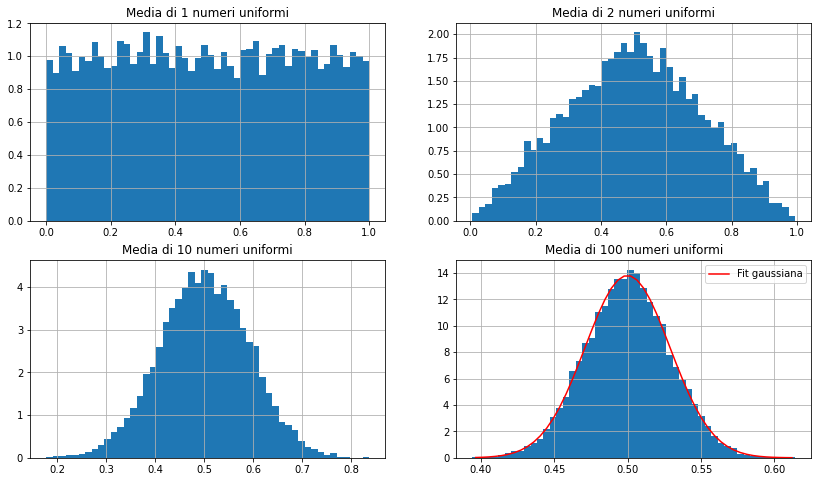

In [14]:
# Carica i dati da file
unif = []
for i in range(4):
    unif.append(np.loadtxt(f"../Esercizio1/uniforme_{i}.txt"))

# Prepara quattro immagini per gli istogrammi
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
ax = ax.reshape(-1)

# Disegna gli istogrammi
n_bins = 50
N = [1, 2, 10, 100]
for i in range(4):
    n, bins, patches = ax[i].hist(unif[i], n_bins, density=True)
    ax[i].grid(True)
    ax[i].set_title(f'Media di {N[i]} numeri uniformi')
    
# Fai il fit dell'ultimo istrogramma con una gaussiana
x = [(bins[i] + bins[i + 1]) / 2 for i in range(n_bins)]
p_opt, p_cov = curve_fit(gauss, x, n, p0 = [15, 500, 0.5])
y_fit = gauss(x, p_opt[0], p_opt[1], p_opt[2])
ax[3].plot(x, y_fit, color = "red", label = "Fit gaussiana")
ax[3].legend()
plt.show()

In [11]:
print("Parametri ottimizzati [a, b, c] =", p_opt)
print("Incertezza dei parametri =" , np.sqrt(np.diagonal(p_cov)))

Parametri ottimizzati [a, b, c] = [1.38036215e+01 5.99624637e+02 4.99867377e-01]
Incertezza dei parametri = [8.74358286e-02 8.77167654e+00 2.11207249e-04]


Dai quattro istogrammi si vede che la distribuzione delle medie tende a una gaussiana aumentando il numero di elementi su cui mediare. Inoltre dal teorema del limite centrale possiamo calcolare i valori attesi per i parametri $[a, b, c]$, infatti vale

$$
a = \sqrt{\frac{N}{2 \pi \sigma^2}} = 13.82 \quad \quad b = \frac{N}{2 \sigma^2} = 600 \quad \quad c = \mu = 0.5
$$

dove $\mu$ e $\sigma^2$ sono il valore medio e la varianza della distribuzione uniforme. Prendendo i parametri ottenuti con il fit si vede che questi distano meno di una deviazione standard dai valori attesi e quindi sono compatibili.

### Esponenziale

Per ottenere gli istrogrammi con la distribuzione esponenziale implemento una classe figlia analoga a quella utilizzata per il punto precedente, l'unica differenza consiste nel prendere dati distribuiti in modo esponenziale invece che uniforme. Anche in questo caso i seguenti grafici sono stati ottenuti utilizzando $10^4$ blocchi ciascuno.

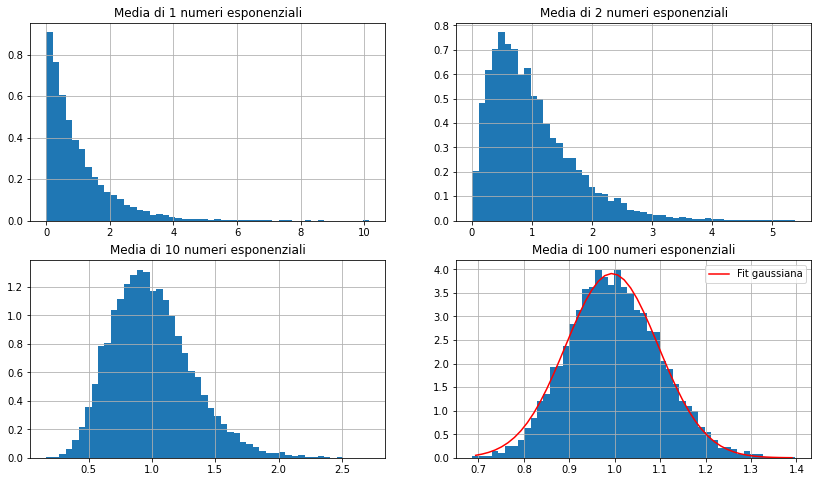

In [15]:
# Carica i dati da file
expo = []
for i in range(4):
    expo.append(np.loadtxt(f"../Esercizio1/esponenziale_{i}.txt"))

# Prepara quattro immagini per gli istogrammi
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
ax = ax.reshape(-1)

# Disegna gli istogrammi
n_bins = 50
N = [1, 2, 10, 100]
for i in range(4):
    n, bins, patches = ax[i].hist(expo[i], n_bins, density=True)
    ax[i].grid(True)
    ax[i].set_title(f'Media di {N[i]} numeri esponenziali')
    
# Fai il fit dell'ultimo istrogramma con una gaussiana
x = [(bins[i] + bins[i + 1]) / 2 for i in range(n_bins)]
p_opt, p_cov = curve_fit(gauss, x, n)
y_fit = gauss(x, p_opt[0], p_opt[1], p_opt[2])
ax[3].plot(x, y_fit, color = "red", label = "Fit gaussiana")
ax[3].legend()
plt.show()

In [16]:
print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

optimized parameters [a,b,c] =
[ 3.91204433 47.8484464   0.99372735]
parameters uncertainty =
[0.04044706 1.14328758 0.00122022]


Dagli istrogrammi si vede che la distribuzione delle medie sta tendendo a una gaussiana, ma per ottenerne una è necessario fare la media su un numero maggiore di elementi. Questo si riscontra anche guardando i parametri teorici che si ottengono utilizzando le formule precedenti con $\mu = \sigma^2 = 1$, ovvero $a = 3.99, b = 50, c = 1$. Questi valori non sono in accordo con quelli trovati con l'ottimizzazione, infatti $a$ e $b$ distano circa $2$ deviazioni standard dal modello mentre $c$ dista circa $5$ deviazioni.

### Cauchy

Questa simulazione è stata fatto in modo analogo alle due precedenti, introducendo dove necessario la distribuzione lorentziana. Anche in questo caso ho utilizzato $10^4$ blocchi per gli istrogrammi.

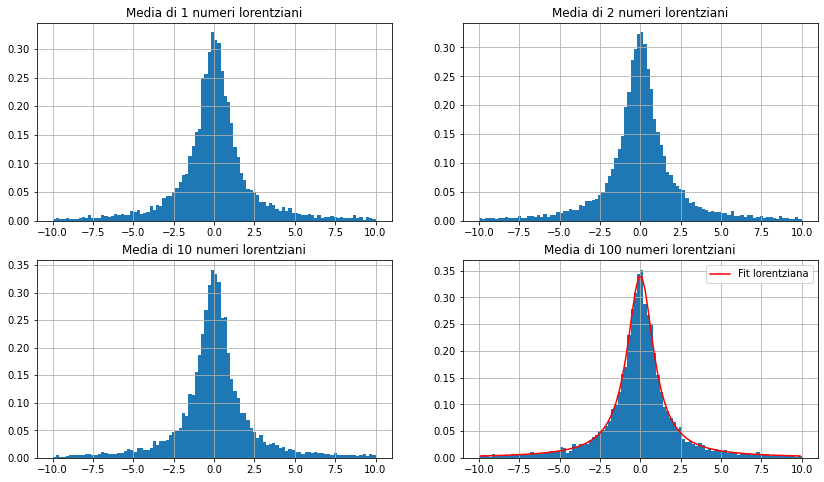

In [17]:
# Carica i dati da file
cauchy = []
for i in range(4):
    cauchy.append(np.loadtxt(f"../Esercizio1/cauchy_{i}.txt"))

# Prepara quattro immagini per gli istogrammi
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
ax = ax.reshape(-1)

# Disegna gli istogrammi
n_bins = 100
N = [1, 2, 10, 100]
for i in range(4):
    n, bins, patches = ax[i].hist(cauchy[i], n_bins, density=True, range=(-10,10))
    ax[i].grid(True)
    ax[i].set_title(f'Media di {N[i]} numeri lorentziani')
    
# Fai il fit dell'ultimo istrogramma con una lorentziana
x = [(bins[i] + bins[i + 1]) / 2 for i in range(n_bins)]
p_opt, p_cov = curve_fit(lorentz, x, n)
y_fit = lorentz(x, p_opt[0], p_opt[1], p_opt[2])
ax[3].plot(x, y_fit, color = "red", label = "Fit lorentziana")
ax[3].legend()
plt.show()

In [18]:
print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

optimized parameters [a,b,c] =
[0.3359149  0.9823991  0.00682303]
parameters uncertainty =
[0.00588582 0.02176882 0.00775115]


Gli istogrammi della lorentziana rimangono delle lorentziane. Possiamo confrontare i parametri ottenuti dal fit con i parametri iniziali della lorenziana ovvero $a = \frac{1}{\pi} = 0.318, b = 1, c = 0$. I valori di $b$ e $c$ distano meno di una deviazione standard dal valore iniziale. L'unico che sembra essere cambiato è $a$, questo però è dovuto al fatto che nell'istrogramma della lorentziana compaiono valori a grandi $x$ e facendo un istrogramma questi vengono necessariamente tagliati. Di conseguenza la normalizzazione della lorenziana cambia e quindi anche il valore di $a$. Aumentando il range dell'istogramma si vede effettivamente che il valore di $a$ ottenuto con il fit dimunuisce e si avvicina a quello iniziale.

## Esperimento di Buffon

Per la simulazione dell'esperimento di Buffon utilizzo i metodi *GetSomme* e *Results* come nel primo eserciio. Adesso il metodo *CalcolaBlocco* genera inizialmente due numeri casuali, $x \in [-1, 1]$ e $y \in [0, 1]$ e controlla se il punto $(x, y)$ è all'interno di un semicerchio; per fare questo utilizza una tecnica di rigetto andando a misurare la distanza dall'origine. La posizione casuale ottenuta serve per determinare la direzione in cui punta l'ago lanciato. Generando un terzo numero casuale $z \in [0, 1]$ ottengo la posizione di un estremo dell'ago. Se $z$ è $0$ o $1$ allora l'ago è sulla linea, altrimenti calcolo la posizione del secondo estremo dell'ago secondo

$$
z' = z + \frac{L}{d} cos(\theta) = z + \frac{L}{d} \frac{x}{\sqrt{x^2 + y^2}} 
$$

dove $L$ è la lunghezza dell'ago e $d$ è la distanza tra due linee. Se $z' \leq 0$ oppure $z' \geq 1$ allora significa che l'ago tocca la linea. Sapendo quanti aghi toccano la linea posso calcolare il valore di $\pi$.

Per la seguente simulazione ho utilizzato $d = 2L$, ho utilizzato $100$ blocchi ognuno con $10^6$ lanci dell'ago.

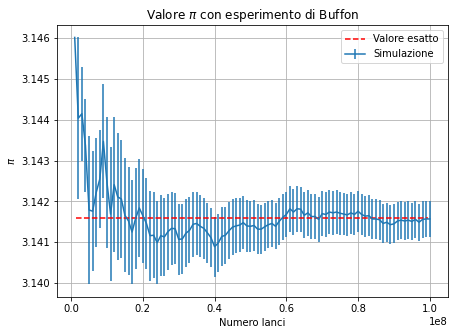

In [19]:
# Carico dati da file
x_pi, pi, pi_err = np.loadtxt("../Esercizio1/pi_greco.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

# Faccio il grafico
fig, ax = plt.subplots(1, 1,figsize=(7,5))
ax.errorbar(x_pi, pi, yerr = pi_err, label = "Simulazione")
ax.set_xlabel('Numero lanci')
ax.set_ylabel('$\pi$')
ax.axhline(y = np.pi, xmin = 0.05, xmax = 0.95, color = "red", ls = "--", label = "Valore esatto")
ax.set_title("Valore $\pi$ con esperimento di Buffon")
ax.legend()
ax.grid(True)

Il valore ottenuto tende effettivamente al valore di $\pi$ anche se molto lentamente. Il risultato ottenuto quasi coincide con il valore esatto.